# Estimación del precio de una vivienda 

Este notebook, by [Felipe Alonso Atienza](www.linkedin.com/in/felipe-alonso-atienza)

En este notebook haremos un análisis exploratorio básico de la base de datos de viviendas [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction), para familiarizarnos con los datos y posteriormente aplicar técnicas de machine learning sobre ellos. 

Para cada vivienda, se tienen los siguientes atributos, características o features:

| Atributo | descripción |
| :- |:- |
|*id*| identificador de la vivienda|
| *date*| fecha
| *price*| precio
| *bedrooms*| número de habitaciones
| *bathrooms*| número de baños/aseos
| *sqtf_living*| superficie habitable (en pies al cuadrado)
| *sqft_lot*| superficie de la parcela (en pies al cuadrado)
| *floors*| número de plantas
| *waterfront*| indica si la vivienda tiene acceso a un lago
| *view*| tipo de vista (variable numérica)
| *condition*| condición de la vivienda (variable númerica)
| *grade*| medida de la calidad de la construcción (variable numérica)
| *sqft_above*| superficie por encima del suelo (en pies al cuadrado)
| *sqft_basement*| superficie del sótano (en pies al cuadrado)
| *yr_built*| año de construcción de la vivienda
| *yr_renovated*| año de renovación de la vivienda
| *lat*| latitud de la parcela
| *long*| longitud de la parcela
| *sqft_living15*| superficie habitable promedio de los 15 vecinos más cercanos 				
| *sqft_lot15*| superficie de la parcela promedio de los 15 vecinos más cercanos

Vamos a utilizar **DataFrames** de [Pandas](http://pandas.pydata.org/). Como es sabido, Pandas es un módulo de python de código abierto para el análisis de datos, que proporciona estructuras de datos fáciles de utilizar. Como guía de referencia básica, puede consultarse la [cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

In [1]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

# 1. Cargar datos

In [2]:
house_data = pd.read_csv("./data/kc_house_data.csv") # cargamos fichero
house_data.head(5)                                   # visualizamos 5 primeras filas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Podemos observar que todas las variables son de tipo numérico, así que no tenemos que codificar ninguna de ellas. Por otro lado, los atributos *id* y *date* no nos aportan información, así que los descartamos del DataFrame

In [3]:
# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)
house_data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Antes seguir con nuestro análisis, vamos a transformar las variables de superficie para expresarlas en $m^2$. Posteriormente, renombraremos las columnas.

In [4]:
# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

# visualizamos
house_data.head(5)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509


## 2. Análisis exploratorio

Ahora que ya tenemos cargados los datos que queremos analizar en un objeto Pandas, vamos a realizar un análisis básico de los mismos. 

Una buena práctica es intentar resumir toda la información posible de los datos. Habitualmente nos interesa saber la media y desviación estándar, posiblemente quartiles de cada una de las variables. Esto nos permitirá, por una lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otra, nos permitirá verificar si existen datos anómalos, también conocidos como [**outliers**](https://en.wikipedia.org/wiki/Outlier). 

In [5]:
house_data.describe()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,193.229008,1403.483212,1.494309,0.007542,0.234303,3.409430,7.656873,166.146932,27.082077,1971.005136,84.402258,98077.939805,47.560053,-122.213896,184.556766,1186.228346
std,3.671272e+05,0.930062,0.770163,85.325951,3848.091438,0.539989,0.086517,0.766318,0.650743,1.175459,76.932169,41.116567,29.373411,401.679240,53.505026,0.138564,0.140828,63.674936,2536.641292
min,7.500000e+04,0.000000,0.000000,26.941882,48.309581,1.000000,0.000000,0.000000,1.000000,1.000000,26.941882,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.068313,60.479879
25%,3.219500e+05,3.000000,1.750000,132.572638,468.231322,1.000000,0.000000,0.000000,3.000000,7.000000,110.554618,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,138.425530,473.805504
50%,4.500000e+05,3.000000,2.250000,177.444806,707.735359,1.500000,0.000000,0.000000,3.000000,7.000000,144.928742,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,170.941594,707.921165
75%,6.450000e+05,4.000000,2.500000,236.902752,992.947692,2.000000,0.000000,0.000000,4.000000,8.000000,205.315718,52.025702,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.251174,936.741352
max,7.700000e+06,33.000000,8.000000,1257.907162,153416.271231,3.500000,1.000000,4.000000,5.000000,13.000000,874.217606,447.792653,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.927878,80937.128448


A pesar de este resumen, conviene siempre hacer representaciones gráficas, que nos ofrecen, en general un mejor entendimiento de los datos. Para ello vamos representar los histogramas de algunos atributos: *bedrooms*, *sqm_living* y *yr_built*

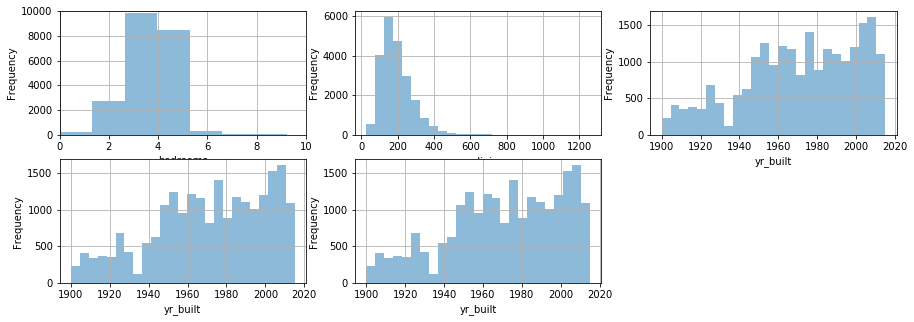

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(2,3,1)
house_data['bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 10, 0, 10000])
plt.xlabel('bedrooms')

plt.subplot(2,3,2)
house_data['sqm_living'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('sqm_living')

plt.subplot(2,3,3)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')

plt.subplot(2,3,4)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')

plt.subplot(2,3,5)
house_data['yr_built'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('yr_built')


plt.show()

Una vez que hemos analizado las variables por separado, el siguiente paso en un análisis exploratorio sería el entender las relaciones entre cada una de las variables/atributos ($\mathbf{x}$) y la variable respuesta ($y$). 

Para ello vamos a utilizar un [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) con la variable objetivo definida $y$ como variable dependiente, y alguna una de las variables explicativas como variables independientes. En el caso de la variable *waterfront*, dado que ésta es binaria, vamos a utilizar un [boxplot](https://en.wikipedia.org/wiki/Box_plot).

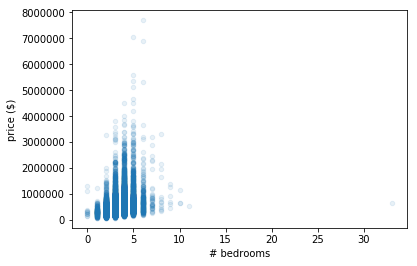

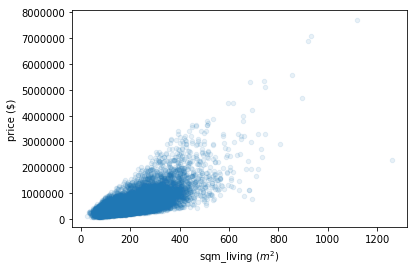

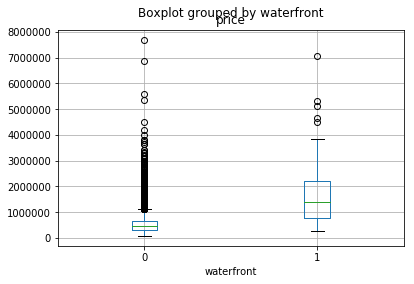

In [9]:
# Sólo representamos 3: bedrooms, sqm_living y waterfront
# el resto se puede repetir una a una

house_data.plot(kind = 'scatter',x='bedrooms',y = 'price', alpha=0.1)
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='sqm_living',y = 'price', alpha=0.1)
plt.xlabel('sqm_living ($m^2$)')
plt.ylabel('price ($)')
plt.show()

house_data.boxplot(by='waterfront',column = 'price')
plt.show()

Una vez que hemos hecho un primer análisis exploratorios, el siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto nos puede servir para identificar posibles atributos que estén altamente correlacionados. 

Si la correlación entre dos atributos es muy grande, se dice que la matriz de atributos es singular, y como ya vimos, esto es una fuente de error importante en algunos algoritmos de machine learning, como por ejemplo en el caso de la [regresión lineal](https://es.wikipedia.org/wiki/Regresión_lineal). 

Este problema se denomina *colinealidad*. Para hacer frente a él, normalmente se evalúa [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson) ($\rho$) entre las diferentes atributos de tal forma que se descartan que tengan un $\rho$ superior a un umbral que establezcamos a priori ($|\rho|>0.9$, por ejemplo). Hay que tener en cuenta que $-1<\rho<1$, de tal forma que valores próximos a $0$ indican que no hay correlación y valores próximos a $1$ o $-1$ indican una alta correlación.

In [10]:
house_data.corr() # matriz de correlación

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqm_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqm_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


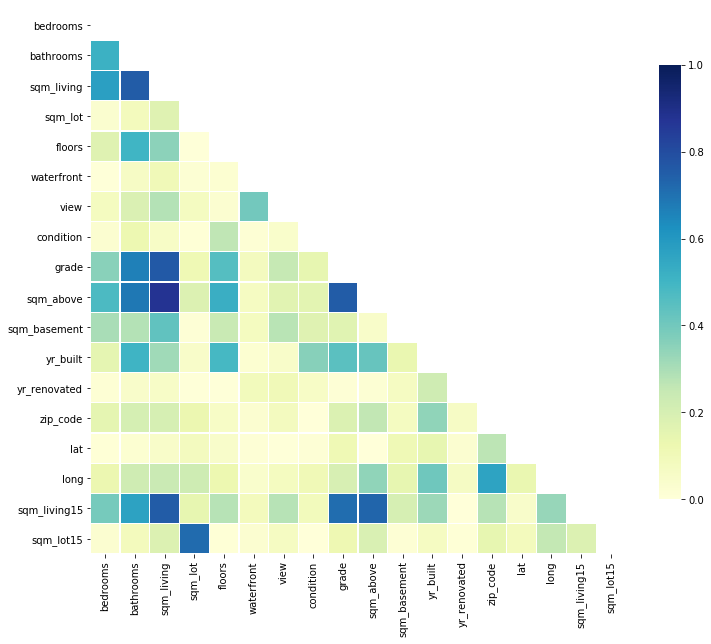

In [11]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data.drop(['price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

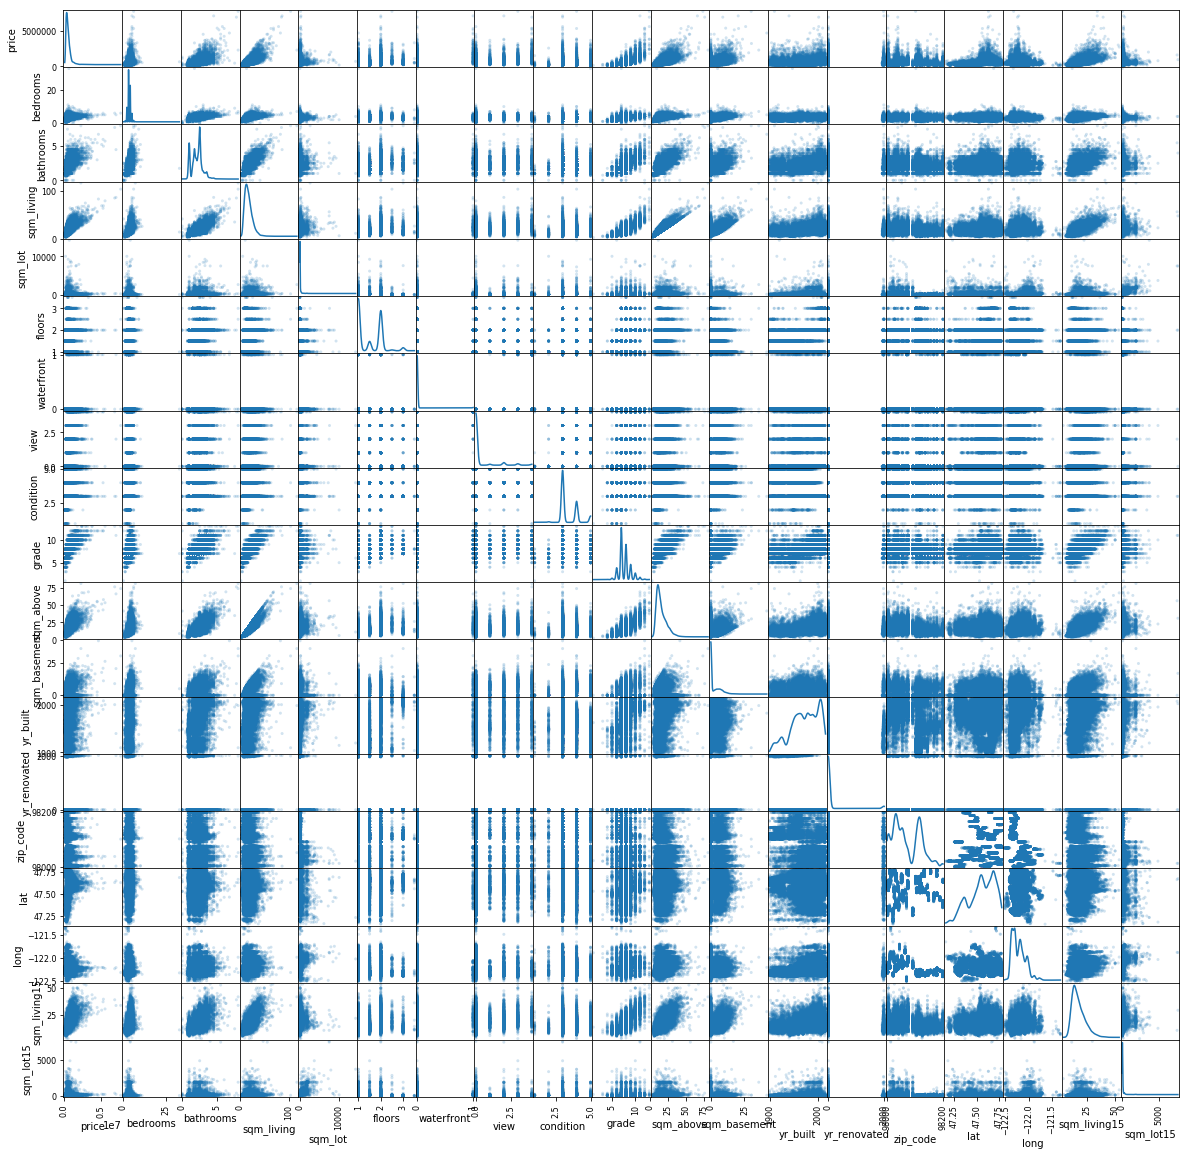

In [18]:
pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

Este sería el momento de pensar sobre otras variables que tuvieran sentido, y de eliminar variables con altar correlación. Así:

- Eliminar *sqm_living* o *sqm_above*
- Construir el atributo antigüedad de la casa en vez de año de la construcción
